## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
from fastai.vision import *

In [3]:
np.random.seed(303)

In [4]:
dataroot = Path('../data').resolve()

In [5]:
tfms = get_transforms(max_lighting=0.05, max_rotate=.5, max_zoom=1.05, max_warp=0.)

In [6]:
bs = 64

In [7]:
arch = models.resnet50

In [8]:
src = (ImageItemList.from_csv(dataroot, 'labels.csv', folder='images', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(label_delim=' '))

In [9]:
data = (src.transform(tfms, size=128, padding_mode='zeros', resize_method=ResizeMethod.SQUISH)
        .databunch(bs=bs).normalize(imagenet_stats))

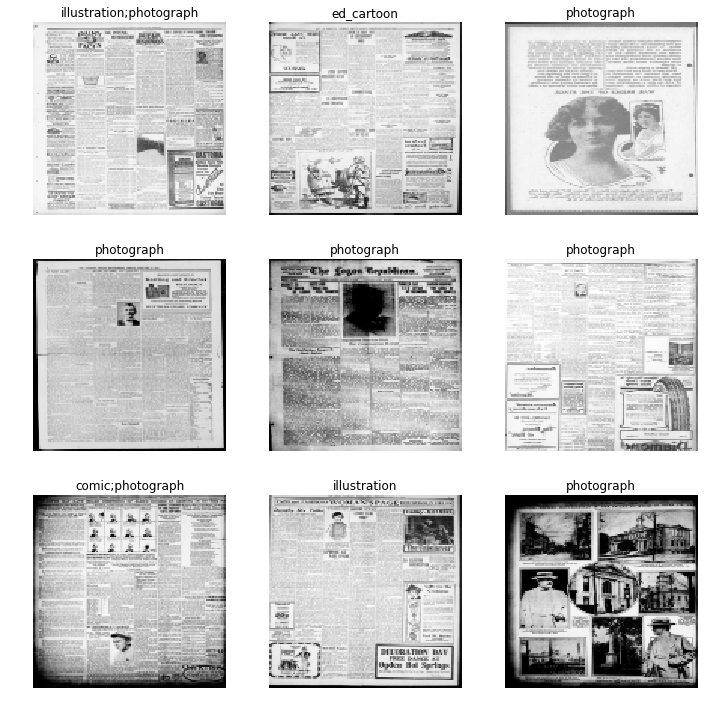

In [10]:
data.show_batch(rows=3, figsize=(10, 10))

In [11]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [12]:
learn = create_cnn(data, arch, metrics=[acc_02, f_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


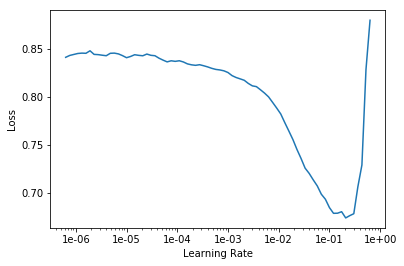

In [13]:
lrf = learn.lr_find()
learn.recorder.plot()

In [14]:
lr = 2e-2

In [15]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.733183,0.541217,0.490076,0.565696
2,0.523099,0.364674,0.801527,0.752851
3,0.431043,0.344471,0.839695,0.754520
4,0.376586,0.326959,0.847328,0.779450
5,0.337674,0.313356,0.840458,0.780003


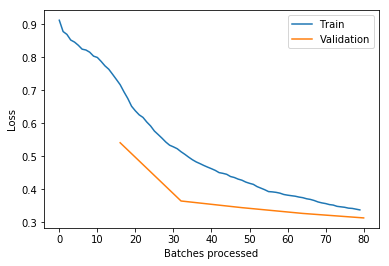

In [16]:
learn.recorder.plot_losses()

In [18]:
learn.save('res50-128-frozen')

-------

In [ ]:
# _ = learn.load('res50-128-frozen')

In [19]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


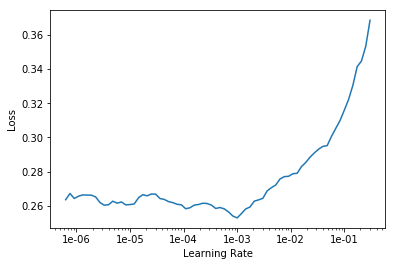

In [20]:
lrf = learn.lr_find()
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(5, slice(2e-4, lr / 5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.275392,0.419103,0.766412,0.664561
2,0.287236,0.866153,0.863359,0.739412
3,0.276692,0.271304,0.874809,0.816607
4,0.242043,0.275964,0.848092,0.799181
5,0.210789,0.245022,0.875573,0.822718


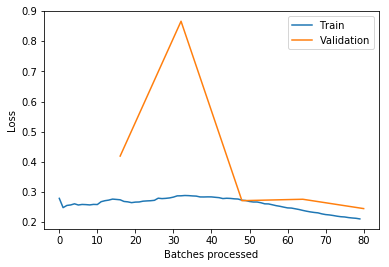

In [22]:
learn.recorder.plot_losses()

In [23]:
learn.save('res50-128-unfrozen')

--------

In [27]:
# _ = learn.load('res50-128-unfrozen')

In [28]:
data = (src.transform(tfms, size=256, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=bs // 2).normalize(imagenet_stats))

learn.data = data

In [29]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


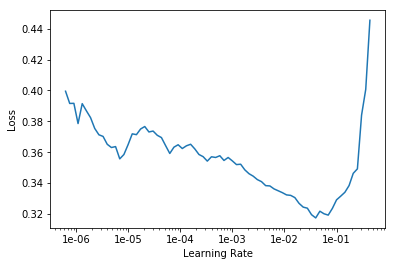

In [30]:
lrf = learn.lr_find()
learn.recorder.plot()

In [31]:
lr2 = 3e-3

In [32]:
learn.fit_one_cycle(5, slice(lr2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.333149,0.296022,0.838168,0.761762
2,0.298623,0.253957,0.850382,0.817796
3,0.271762,0.242592,0.857252,0.819348
4,0.252900,0.242127,0.863359,0.823178
5,0.238535,0.240525,0.867176,0.817255


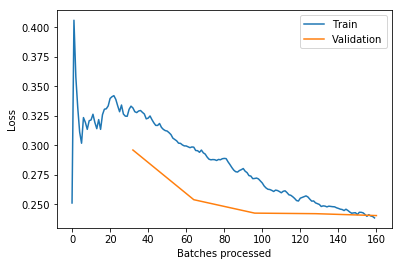

In [33]:
learn.recorder.plot_losses()

In [34]:
learn.save('res50-224-frozen')

In [35]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


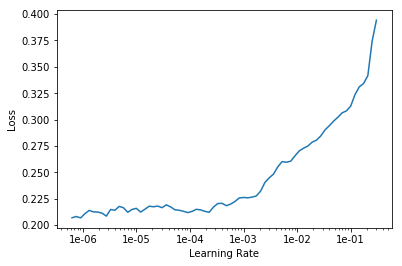

In [36]:
lrf = learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(5, slice(5e-5, lr2 / 5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.220616,0.250354,0.879389,0.831803
2,0.203244,0.236201,0.881679,0.842936
3,0.177857,0.217417,0.883206,0.861842
4,0.147308,0.229181,0.895420,0.867307
5,0.120561,0.218580,0.900000,0.868233


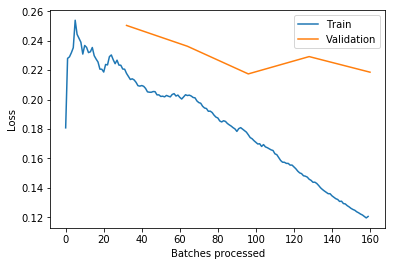

In [38]:
learn.recorder.plot_losses()

In [39]:
learn.save('res50-224-unfrozen')